# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

You will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of your notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have a good README.md file.** 

Don't forget to cite your data sources!

*All libraries used should be added here*

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data


In [251]:
act_17 = pd.read_csv("../data/act_2017.csv")
act_18 = pd.read_csv("../data/act_2018.csv")
act_19 = pd.read_csv("../data/act_2019.csv")

In [252]:
sat_17 = pd.read_csv("../data/sat_2017.csv")
sat_18 = pd.read_csv("../data/sat_2018.csv")
sat_19 = pd.read_csv("../data/sat_2019.csv")

#### 2. Preview and inspect the data


In [253]:
act_17.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [254]:
sat_17.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Look for errors in the data


In [255]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                51 non-null     object
 1   Participation                        51 non-null     object
 2    Evidence-Based Reading and Writing  51 non-null     int64 
 3    Math                                51 non-null     int64 
 4    Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [256]:
act_17['Participation'] = act_17['Participation'].str.rstrip('%').astype('float') 
# act_18['s_participation_18 '] = act_18['Participation'].str.rstrip('%').astype('float') 
# act_19['Participation'] = act_19['Participation'].str.rstrip('%').astype('float') 

sat_17['Participation'] = sat_17['Participation'].str.rstrip('%').astype('float') 
# sat_18['Participation'] = sat_18['Participation'].str.rstrip('%').astype('float') 
# sat_19['Participation'] = sat_19['Participation Rate'].str.rstrip('%').astype('float')

# act_2017 composite was a string due 

In [257]:
sat_17.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 3a. Hint - Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [258]:
act_17['Participation']
# 100% participation is questionables as it is likely that not all students took the ACT even if it is mandatory.

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [259]:
# 94.4 - (23.3 + 23.1 + 24.2)

#### 4. Fix any errors you identified

In [260]:
# Maryland had 2.4 Science ACT score
# act_17['Science']
# Changed to correct score

sat_17['Math'] < 300
# changed  Marylands to correct math score

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: Math, dtype: bool

#### 5. Fix any incorrect data types

Done in answer 3

#### 6. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference between the SAT columns and the ACT columns. Remember that you have data from multiple years.

- Column names should be all lowercase
- Column names should not contain spaces 
- Column names should be unique and informative

In [261]:
act_17 = act_17.rename(columns = {"State" : "state",
                        "Participation": "act_participation_17", 
                        "English": "act_english_17", 
                         "Math": "act_math_17",
                         "Reading": "act_reading_17",
                         "Science": "act_science_17",
                         "Composite":"act_composite_17"
                                                    })

In [262]:
sat_17 = sat_17.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_17", 
                        "Evidence-Based Reading and Writing": "sat_ebrw_17", 
                         "Math": "sat_math_17",
                         "Math": "sat_math_17",
                         "Total": "sat_total_17",
                                                    })


#### 7. Create a data dictionary

Now that you've fixed our data and given it appropriate names, create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

<!-- act_17_dict = {'Feature' : 'State', 'Type' : 'String', 'Dataset' :'ACT 2017', 'Description': 'ACT '} -->

| Feature | Type | Dataset | Description |
| --- | --- | --- | --- |
| state | object | ACT | state of the data for ACT

#### 8. Drop any unnecessary rows

In [263]:
#  National average is not relevant
act_17 = act_17.drop(index = 0)

#### 9. Merge Dataframes

Join the 2017 ACT and SAT DataFrames using the _state_ in each DataFrame as the key.

In [264]:
combined_2017 = pd.merge(act_17, sat_17, left_on ='state', right_on='state')

#### 10. Save your cleaned, merged dataframe

Use a relative path to save your data as `combined_2017.csv`.

In [265]:
combined_2017.to_csv('../data/combined_2017.csv',  index=False)

## 2018 & 2019 Data Import and Cleaning

Read in the 2018 data. Inspect and clean. Save. Do the same with the 2019 data.

In [266]:
act_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           52 non-null     object 
 1    Participation  52 non-null     object 
 2   Composite       52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [267]:
# act_18['Participation'] = act_18['Participation'].str.rstrip('%').astype('float') 
act_19[' Participation'] = act_19[' Participation'].str.rstrip('%').astype('float') 

sat_18['Participation'] = sat_18['Participation'].str.rstrip('%').astype('float') 
sat_19['Participation'] = sat_19['Participation'].str.rstrip('%').astype('float')


In [268]:
act_18 = act_18.rename(columns = {"State" : "state",
                        "Participation": "act_participation_18", 
                         "Composite":"act_composite_18"
                                                    })
act_18

,state,act_participation_18,act_composite_18
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [269]:
sat_18 = sat_18.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_18", 
                        " Evidence-Based Reading and Writing": "sat_ebrw_18", 
                         " Math": "sat_math_18",
                         " Total": "sat_total_18",
                                                    })


In [270]:
act_19 = act_19.rename(columns = {"State" : "state",
                        " Participation": "act_participation_19", 
                         "Composite":"act_composite_19"
                                                    })



In [271]:
sat_19 = sat_19.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_19", 
                        " Evidence-Based Reading and Writing": "sat_ebrw_19", 
                         " Math": "sat_math_19",
                         " Total": "sat_total_19",
                                                    })

In [272]:
combined_2018 = pd.merge(act_18, sat_18, left_on='state', right_on='state')

In [273]:
combined_2018.to_csv('../data/combined_2018.csv',  index=False)

In [274]:
combined_2019 = pd.merge(act_19, sat_19, left_on='state', right_on='state')

In [275]:
combined_2019.to_csv('../data/combined_2019.csv',  index=False)

## Combine your 2017, 2018, and 2019 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. 

Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged DataFrame as `final.csv`.

**Use this combined DataFrame for the remainder of the project**.

In [276]:
combined_17_18 = pd.merge(combined_2017, combined_2018, left_on='state', right_on='state')

In [277]:
final = pd.merge(combined_17_18, combined_2019, left_on='state', right_on='state')

In [278]:
final.to_csv('../data/final.csv',  index=False)

# Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [279]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   act_participation_17  51 non-null     float64
 2   act_english_17        51 non-null     float64
 3   act_math_17           51 non-null     float64
 4   act_reading_17        51 non-null     float64
 5   act_science_17        51 non-null     float64
 6   act_composite_17      51 non-null     float64
 7   sat_participation_17  51 non-null     float64
 8   sat_ebrw_17           51 non-null     int64  
 9   sat_math_17           51 non-null     int64  
 10  sat_total_17          51 non-null     int64  
 11  act_participation_18  51 non-null     object 
 12  act_composite_18      51 non-null     float64
 13  sat_participation_18  51 non-null     float64
 14  sat_ebrw_18           51 non-null     int64  
 15  sat_math_18           51 

In [280]:
final['sat_participation_17'] = final['sat_participation_17'].str.rstrip('%').astype('float') 
final['act_participation_17'] = final['act_participation_17'].str.rstrip('%').astype('float') 
final['act_participation_18'] = final['act_participation_18'].str.rstrip('%').astype('float') 

AttributeError: Can only use .str accessor with string values!

## Investigate trends in the data
Using sorting to consider the following questions:

- Which states have the highest and lowest participation rates for each test for each year?
- Which states have the highest and lowest mean total/composite scores for each test for each year?
- Which states have large changes in participation or scores?

Based on what you've just observed, have you identified any states that you're especially interested in? If so, why?

In [281]:
final


,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,...,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,sat_ebrw_19,sat_math_19,sat_total_19
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,6.0,595,571,1166,100.0,18.9,7.0,583,560,1143
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,43.0,562,544,1106,38.0,20.1,41.0,556,541,1097
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,29.0,577,572,1149,73.0,19.0,31.0,569,565,1134
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,5.0,592,576,1169,100.0,19.3,6.0,582,559,1141
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,60.0,540,536,1076,23.0,22.6,63.0,534,531,1065
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,...,100.0,519,506,1025,27.0,23.8,100.0,518,506,1024
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,...,100.0,535,519,1053,22.0,25.5,100.0,529,516,1046
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,...,100.0,505,492,998,13.0,24.1,100.0,499,486,985
8,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,...,56.0,550,549,1099,54.0,20.1,100.0,516,483,999
9,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,...,70.0,542,522,1064,49.0,21.4,71.0,538,519,1058


## Visualize the data

There's not a magic recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Font size is easy to read on a slide
- Plots demonstrate meaningful and valid relationships
- Interpret plots to aid audience understanding

Feel free to make functions to quickly plot relationships (e.g. if you want to make a lot of histograms).



#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

In [306]:
correlation_2019 = final[['sat_total_19','sat_participation_19','act_composite_19','act_participation_19']]
# correlation_2019 = final['sat_total_19'], final['sat_participation_19'], final['act_composite_19'], final['act_participation_19']]

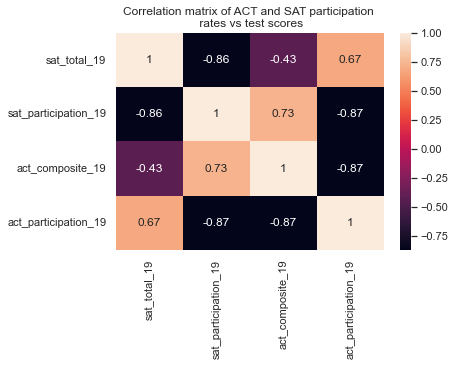

In [315]:
correlation_mat = correlation_2019.corr()
plt.title("Correlation matrix of ACT and SAT participation \n rates vs test scores")


sns.heatmap(correlation_mat, annot = True)

plt.show()

In [316]:
participation_2019 = final['sat_total_19'].corr(final['sat_participation_19'])
final['act_composite_19'].corr(final['act_participation_19'])

-0.8698651745309242

In [317]:
final['sat_participation_19'].min()

2.0

In [192]:
import matplotlib.pyplot as plt
import numpy as np

In [193]:
final.loc[final['state'] == 'Washington']

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,...,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,sat_ebrw_19,sat_math_19,sat_total_19
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541,534,...,69.0,543,538,1081,24.0,22.1,70.0,539,535,1074


In [206]:
final['act_participation_19'].mean()

58.15686274509804

In [207]:
final['sat_participation_19'].mean()

49.15686274509804

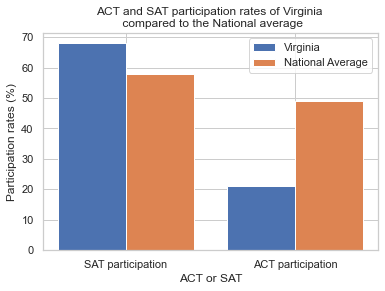

In [225]:
X = ['SAT participation','ACT participation']
Washington = [68, 21]
average = [58, 49]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Washington, 0.4, label = 'Virginia')
plt.bar(X_axis + 0.2, average, 0.4, label = 'National Average')
  
plt.xticks(X_axis, X)
plt.xlabel("ACT or SAT")
plt.ylabel("Participation rates (%)")
plt.title("ACT and SAT participation rates of Virginia \n compared to the National average")
plt.legend()
plt.savefig('Virginia1.png')
plt.show()

In [222]:
final.nsmallest(5, ['sat_total_19'])

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,...,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,sat_ebrw_19,sat_math_19,sat_total_19
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558,528,...,28.0,513,486,999,49.0,20.8,99.0,483,460,943
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530,517,...,8.0,541,521,1062,100.0,18.9,22.0,490,472,963
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,...,100.0,505,492,998,13.0,24.1,100.0,499,486,985
11,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513,493,...,100.0,508,493,1001,31.0,22.5,100.0,505,488,993
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,...,97.0,513,505,1018,12.0,24.7,100.0,503,492,995


Suggests you take the test if you know you are going to do well 

#### Plot and interpret scatter plots for import columns


In [174]:
import seaborn as sns

In [229]:
seaborn_test = final[['sat_participation_19','sat_total_19']]

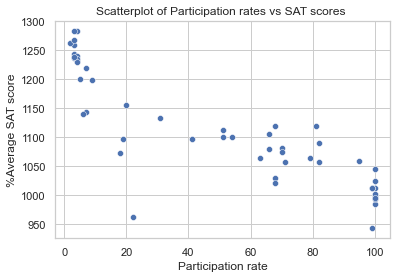

In [250]:
sns.set(style='whitegrid')
plt.xlabel("Participation rate")
plt.ylabel("%Average SAT score")
plt.title ("Scatterplot of Participation rates vs SAT scores ")
sns.scatterplot(x =final['sat_participation_19'], y = final['sat_total_19'],data=seaborn_test)
plt.savefig('ScatterACT.png')

In [187]:
final['sat_total_19'].corr(final['act_composite_19'])

-0.4258168852926788

#### Plot and interpret boxplots for important columns


## Outside Research

Based on your observations, choose **one or more** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. 

If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. Make sure that you cite your sources.

### Why are participation rates low 

## 1) Cost of ACT and SAT 

ACT costs $67 dollars \
SAT cost $65 dollars \
Average  tutor is $45  to $100 per hour \
Strong postive correlation between family income and test results \

## 2) Unprepared Students




## Conclusions and Recommendations

Based on your exploration of the data, what are your 1 or 2 key recommendations for the College Board?

Ensure that your recommendations make sense. These datasets have some limitations - think about granularity, aggregation, the relationships between populations size and rates. Consider the actual populations these data are drawn from. It is okay if your conclusions are tentative. You do not want to make unsupported jumps in logic.

## 1) Make the SAT Mandatory 

## 2) Make the SAT more affordable

## 3) Make all students ready for the SAT 